In [1]:
from nltk.corpus import wordnet
import pandas as pd
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [2]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [3]:
#data = pd.read_csv('../input/loghub-ssh-log-data/SSH.log', sep='\n', names = ['Log_contents'])
#data = pd.read_csv('../input/windows-event-log/eventlog.csv', sep = '\n', names = ['Log_contents'])
#data = pd.read_csv('../input/loghub-apache-log-data/Apache.log', sep = '\n', names = ['Log_contents'])
data = pd.read_csv('../Test/Android.log', sep = '\n', names = ['Log_contents'])
data.head()

,Log_contents
0,12-17 19:31:36.263 1795 1825 I PowerManager_screenOn: DisplayPowerStatesetColorFadeLevel: level=1.0
1,"12-17 19:31:36.263 5224 5283 I SendBroadcastPermission: action:android.com.huawei.bone.NOTIFY_SPORT_DATA, mPermissionType:0"
2,"12-17 19:31:36.264 1795 1825 D DisplayPowerController: Animating brightness: target=21, rate=40"
3,"12-17 19:31:36.264 1795 1825 I PowerManager_screenOn: DisplayPowerController updatePowerState mPendingRequestLocked=policy=BRIGHT, useProximitySensor=true, useProximitySensorbyPhone=true, screenBrightness=33, screenAutoBrightnessAdjustment=0.0, brightnessSetByUser=true, useAutoBrightness=true,..."
4,"12-17 19:31:36.264 1795 2750 I PowerManager_screenOn: DisplayPowerState Updating screen state: state=ON, backlight=823"


In [4]:
print(data.shape)
data = data.sample(10000)
print(data.shape)

(1555005, 1)
(10000, 1)


In [5]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in data['Log_contents'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [6]:
data.head()

,Log_contents
897489,12-18 09:17:28.512 606 2379 E libteec : receive data len = 128
970972,"12-18 10:52:06.612 808 547 D [HWCamera] IppAlgoSmartAE: int android::IppAlgoSmartAE::setSaturationComp(qcamera::QCameraParametersIntf *, uint32_t) qParamIntf = 0xeb9538f0, mSaturationCompToDriver = 256, comp = 256, mOutPutData.outPutSaturationComp = 256"
1501291,"12-18 19:49:14.175 1795 2376 I ActivityManager_service: bindServiceLocked, r: ServiceRecord{e0bf7cf u0 euid: 0 com.huawei.intelligent/com.huawei.placerecognition.service.PlaceRecognitionService}, euid: 0"
5116,12-17 19:31:45.416 1795 2668 D HwWifiP2pService: SleepPolicy:1
293496,12-17 21:27:07.140 31456 31456 I HwOUC : [main-1]DBManager--getCacheContents data is null tableType is 4(/CacheDBManager.java:138)


In [7]:
def syn(word):
    synonyms = []
    antonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())

    print("Synonyms: " + str(set(synonyms)))
    print("Antonyms: " + str(set(antonyms)))

In [8]:
#Adding the Sentiment Polarity column to the data
data['polarity']=polarity
data['subjectivity']=subjectivity

In [9]:
data.head()

,Log_contents,polarity,subjectivity
897489,12-18 09:17:28.512 606 2379 E libteec : receive data len = 128,0.00,0.0
970972,"12-18 10:52:06.612 808 547 D [HWCamera] IppAlgoSmartAE: int android::IppAlgoSmartAE::setSaturationComp(qcamera::QCameraParametersIntf *, uint32_t) qParamIntf = 0xeb9538f0, mSaturationCompToDriver = 256, comp = 256, mOutPutData.outPutSaturationComp = 256",0.00,0.0
1501291,"12-18 19:49:14.175 1795 2376 I ActivityManager_service: bindServiceLocked, r: ServiceRecord{e0bf7cf u0 euid: 0 com.huawei.intelligent/com.huawei.placerecognition.service.PlaceRecognitionService}, euid: 0",0.00,0.0
5116,12-17 19:31:45.416 1795 2668 D HwWifiP2pService: SleepPolicy:1,0.00,0.0
293496,12-17 21:27:07.140 31456 31456 I HwOUC : [main-1]DBManager--getCacheContents data is null tableType is 4(/CacheDBManager.java:138),-0.75,1.0


In [10]:
data.to_csv('windows_logs_sentiment.csv')

In [11]:
#Displaying the POSITIVE comments
data[data.polarity>0].head(10)

,Log_contents,polarity,subjectivity
1331697,12-18 17:30:15.518 2852 2852 D HwCust : Create obj success use class android.app.HwCustNotificationImpl,0.300000,0.000000
244634,12-17 21:16:00.348 24802 24802 I nativeProcess: iqiyi message: create--runOnSubprocess isProcessExist true,0.350000,0.650000
465705,12-17 22:31:39.006 633 31870 I SDK : <2016-12-17 22:31:39> [NOTICE] SDK: UE-SeC 2016-12-17 22:31:39:6 Level[NOTICE] magic[3362781472 161]:VSOCK changes state from busy to idle.,0.100000,0.300000
25447,12-17 19:33:42.186 1795 1825 I WindowManger_keyguard: Setting mDismissKeyguard true by win Window{e6a6b5e u0 com.android.incallui/com.android.incallui.InCallActivity},0.575000,0.525000
1521622,12-18 19:49:55.600 25761 25761 E AppLogApi/FeedbackUtils: packageInstalled true!,0.437500,0.650000
403390,12-17 21:58:35.022 1795 1825 D HwPowerManagerService: ColorTemperature read from old setting:128,0.100000,0.200000
270967,12-17 21:26:04.257 2852 2852 D HwCust : Create obj success use class android.app.HwCustNotificationImpl,0.300000,0.000000
1081413,12-18 14:11:11.752 5994 5994 D wpa_supplicant: wlan0: First radio work item in the queue - schedule start immediately,0.250000,0.333333
14040,12-17 19:32:08.191 3180 3578 I ThermalStateManager: handle action thermal policy:301,0.100000,0.100000
1299783,12-18 15:43:12.465 3180 3332 I ScenarioAction: new ScenarioAction sPoolSize: 0,0.136364,0.454545


In [12]:
#Displaying the NEGATIVE comments
data[data.polarity<0].head(10)

,Log_contents,polarity,subjectivity
293496,12-17 21:27:07.140 31456 31456 I HwOUC : [main-1]DBManager--getCacheContents data is null tableType is 4(/CacheDBManager.java:138),-0.750,1.0
757176,"12-18 07:49:23.117 2852 3556 I NetworkController.MobileSignalController(0): onSignalStrengthsChanged signalStrength=SignalStrength: -1 0 -1 255 -1 255 -1 255 255 19 -101 -8 172 2147483647 2147483647 false gw|lte level=4 isSuspend=false levelOld=4,mSignalStrength level=4",-0.400,0.6
1491254,12-18 19:35:33.581 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-0.400,0.6
726286,12-18 07:31:27.910 2852 2914 I HwMobileSignalController: updateSignalStrength: signalStrength=SignalStrength: -1 0 -1 255 -1 255 -1 255 255 20 -99 -7 174 2147483647 2147483647 false gw|lte,-0.400,0.6
642835,12-17 23:58:02.112 3858 4126 I amsnl : m1: false,-0.400,0.6
1122484,"12-18 14:12:44.027 5157 5157 I chromium: [INFO:CONSOLE(1)] ""Uncaught ReferenceError: WebViewJavascriptBridge is not defined"", source: (1)",-0.750,1.0
572183,12-17 23:22:37.495 633 31870 I SDK : <2016-12-17 23:22:37> [WARN] SDK: UE-SeC 2016-12-17 23:22:37:495 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[33] from the Socket-table Failed!,-0.625,0.3
539532,12-17 23:11:29.905 2852 2852 E KeyguardUpdateMonitor: isSimPinSecure mSimDatas is null or empty,-0.100,0.5
592297,12-17 23:28:34.689 633 31870 I SDK : <2016-12-17 23:28:34> [WARN] SDK: UE-SeC 2016-12-17 23:28:34:689 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[218] from the Socket-table Failed!,-0.625,0.3
489359,12-17 22:42:47.748 633 31870 I SDK : <2016-12-17 22:42:47> [WARN] SDK: UE-SeC 2016-12-17 22:42:47:748 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[161] from the Socket-table Failed!,-0.625,0.3


In [13]:
#Displaying the NEUTRAL comments
data[data.polarity == 0].head(10)

,Log_contents,polarity,subjectivity
897489,12-18 09:17:28.512 606 2379 E libteec : receive data len = 128,0.0,0.0
970972,"12-18 10:52:06.612 808 547 D [HWCamera] IppAlgoSmartAE: int android::IppAlgoSmartAE::setSaturationComp(qcamera::QCameraParametersIntf *, uint32_t) qParamIntf = 0xeb9538f0, mSaturationCompToDriver = 256, comp = 256, mOutPutData.outPutSaturationComp = 256",0.0,0.0
1501291,"12-18 19:49:14.175 1795 2376 I ActivityManager_service: bindServiceLocked, r: ServiceRecord{e0bf7cf u0 euid: 0 com.huawei.intelligent/com.huawei.placerecognition.service.PlaceRecognitionService}, euid: 0",0.0,0.0
5116,12-17 19:31:45.416 1795 2668 D HwWifiP2pService: SleepPolicy:1,0.0,0.0
750339,12-18 07:43:50.506 2852 2852 D NetWorkUtils: mVSimCurCardType is -1,0.0,0.0
294777,"12-17 21:27:15.599 2852 2852 I StackScrollAlgorithm: state.clipTopAmount:177, i:1",0.0,0.0
433891,"12-17 22:25:41.435 835 835 I fingerprintd: FingerprintDaemonProxyEx::onTransact, code:2",0.0,0.0
875096,12-18 09:01:21.556 1795 1807 I HwActivityManagerService: Split enqueueing broadcast [callerApp]:ProcessRecord{34bf34f 0:system/1000},0.0,0.0
637706,"12-17 23:54:43.885 2852 2852 D HwCustMobileSignalControllerImpl: sub =0,strMccMnc =null,hashMccMnc =[],strPlmn =hw_customized_networkType_entry",0.0,0.0
464426,12-17 22:31:15.727 2852 3556 D NetworkController.MobileSignalController(0): mSimSubId:0 onDataActivity: direction=3,0.0,0.0


In [14]:
#Displaying highly subjective reviews
data[data.subjectivity>0.4].head(10)

,Log_contents,polarity,subjectivity
293496,12-17 21:27:07.140 31456 31456 I HwOUC : [main-1]DBManager--getCacheContents data is null tableType is 4(/CacheDBManager.java:138),-0.750,1.000
757176,"12-18 07:49:23.117 2852 3556 I NetworkController.MobileSignalController(0): onSignalStrengthsChanged signalStrength=SignalStrength: -1 0 -1 255 -1 255 -1 255 255 19 -101 -8 172 2147483647 2147483647 false gw|lte level=4 isSuspend=false levelOld=4,mSignalStrength level=4",-0.400,0.600
1491254,12-18 19:35:33.581 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-0.400,0.600
726286,12-18 07:31:27.910 2852 2914 I HwMobileSignalController: updateSignalStrength: signalStrength=SignalStrength: -1 0 -1 255 -1 255 -1 255 255 20 -99 -7 174 2147483647 2147483647 false gw|lte,-0.400,0.600
642835,12-17 23:58:02.112 3858 4126 I amsnl : m1: false,-0.400,0.600
244634,12-17 21:16:00.348 24802 24802 I nativeProcess: iqiyi message: create--runOnSubprocess isProcessExist true,0.350,0.650
1122484,"12-18 14:12:44.027 5157 5157 I chromium: [INFO:CONSOLE(1)] ""Uncaught ReferenceError: WebViewJavascriptBridge is not defined"", source: (1)",-0.750,1.000
539532,12-17 23:11:29.905 2852 2852 E KeyguardUpdateMonitor: isSimPinSecure mSimDatas is null or empty,-0.100,0.500
1012068,12-18 11:44:08.356 2852 2852 W StatusBarKeyguardViewManager: updateStates Show KeyguardStatusBar with clcok: false,-0.400,0.600
25447,12-17 19:33:42.186 1795 1825 I WindowManger_keyguard: Setting mDismissKeyguard true by win Window{e6a6b5e u0 com.android.incallui/com.android.incallui.InCallActivity},0.575,0.525


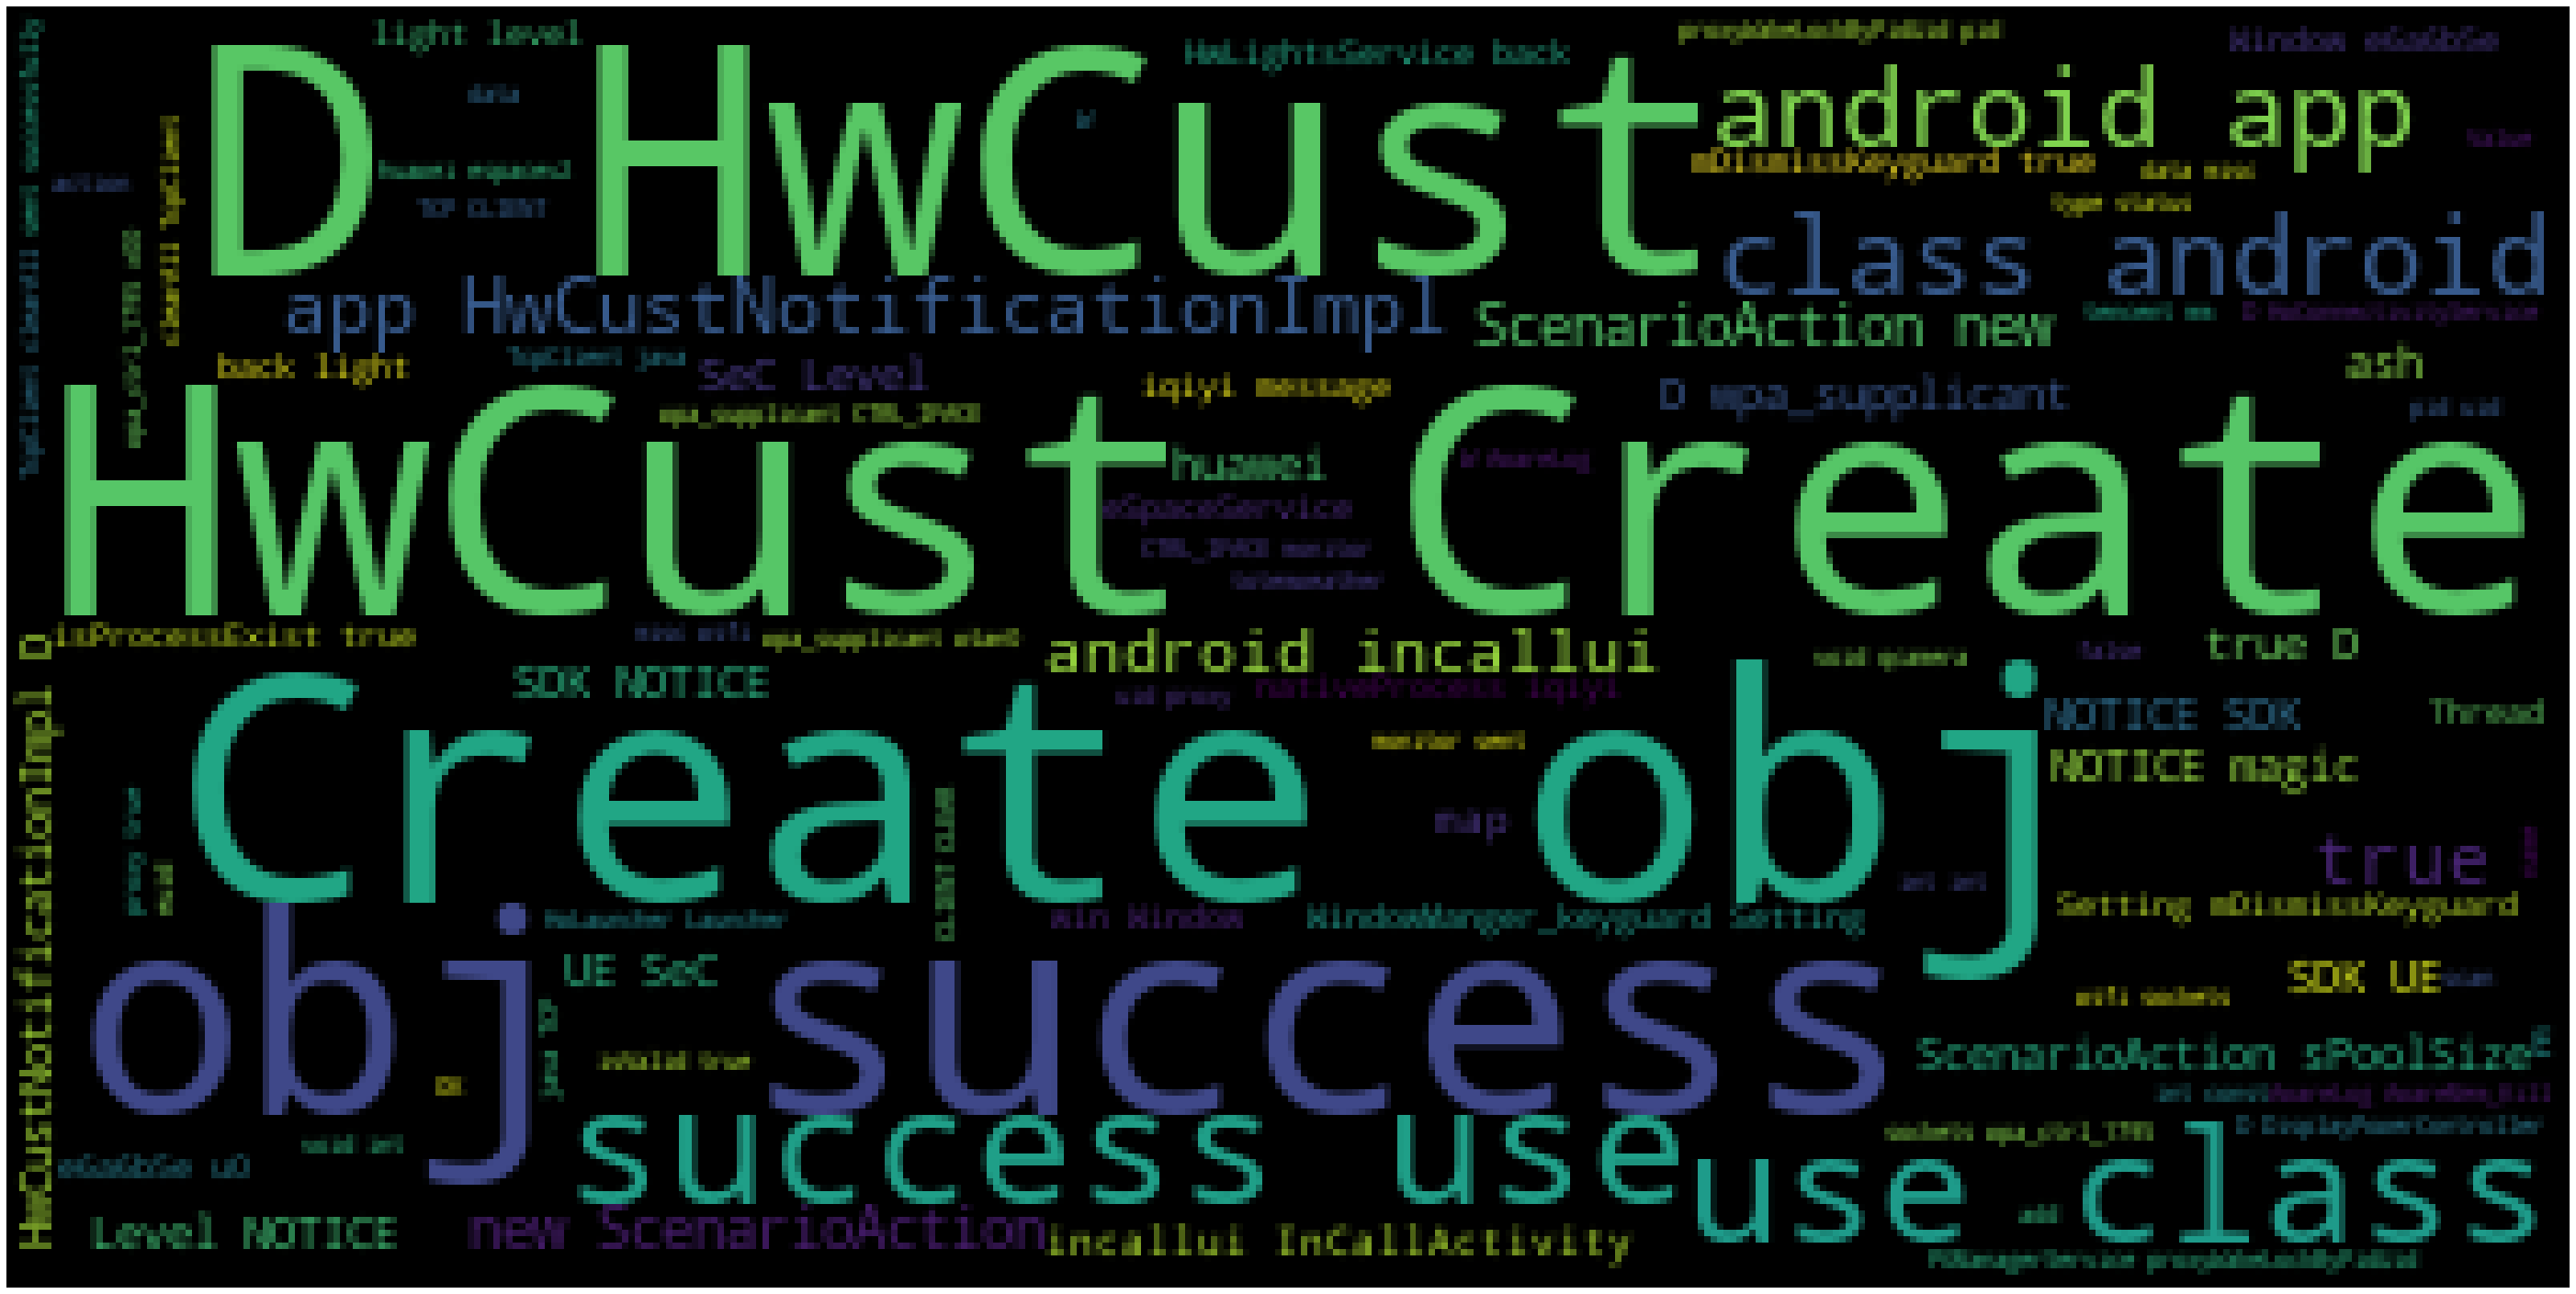

In [15]:
#Word cloud of POSITIVE Log entries
wc(data['Log_contents'][data.polarity>0.1],'black','Common Words' )

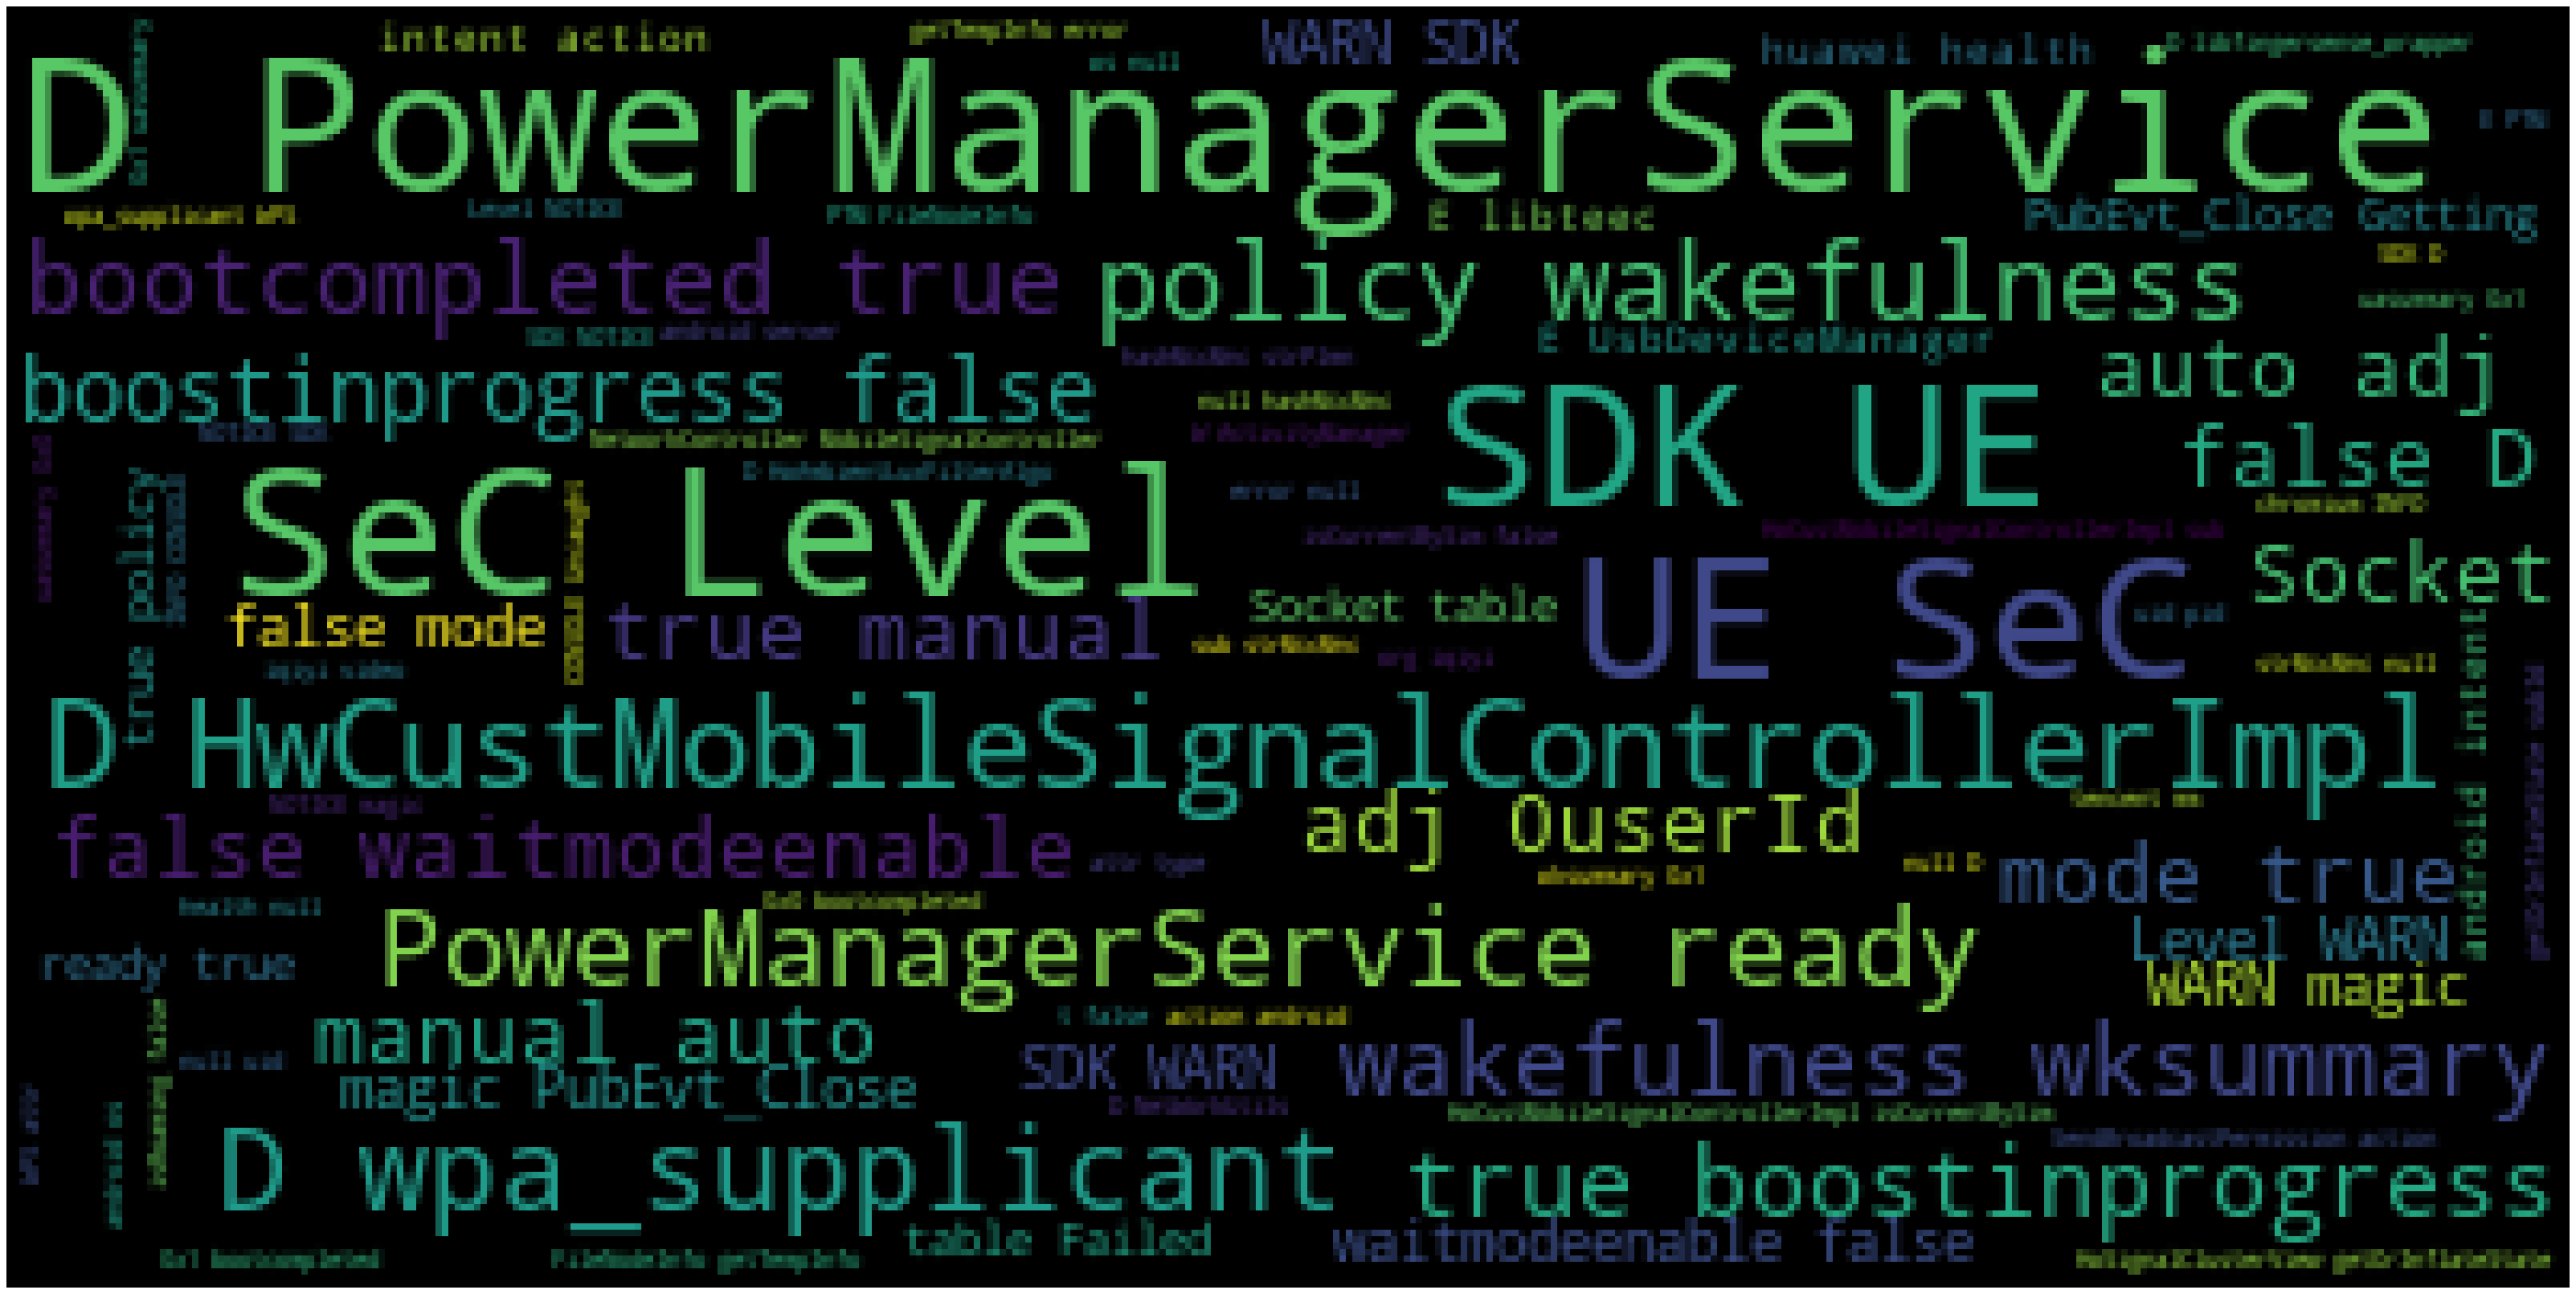

In [16]:
#Word cloud of NEGATIVE Log entries
wc(data['Log_contents'][data.polarity<0.4],'black','Common Words' )

<AxesSubplot:>

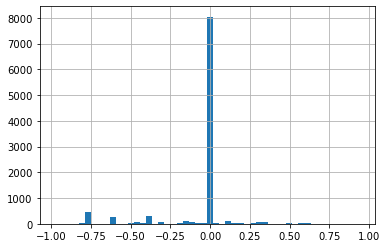

In [17]:
#Distribution of POLARITY
data.polarity.hist(bins=50)

<AxesSubplot:>

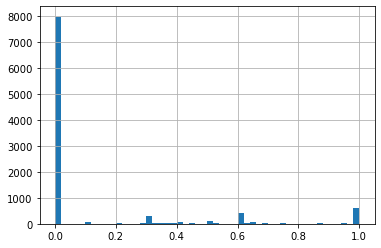

In [18]:
#Distribution of SUBJECTIVITY
data.subjectivity.hist(bins=50)

 0.0    8043
-1.0    1508
 1.0     449
Name: polarity, dtype: int64

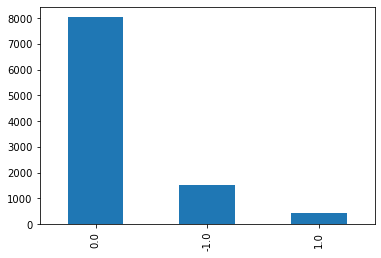

In [19]:
#Converting the polarity values from continuous to categorical
data['polarity'][data.polarity==0]= 0
data['polarity'][data.polarity > 0]= 1
data['polarity'][data.polarity < 0]= -1

#Calculating the count of Positive, Negative & Neutral comments
data.polarity.value_counts().plot.bar()
data.polarity.value_counts()

In [20]:
data.head(20)

,Log_contents,polarity,subjectivity
897489,12-18 09:17:28.512 606 2379 E libteec : receive data len = 128,0.0,0.0
970972,"12-18 10:52:06.612 808 547 D [HWCamera] IppAlgoSmartAE: int android::IppAlgoSmartAE::setSaturationComp(qcamera::QCameraParametersIntf *, uint32_t) qParamIntf = 0xeb9538f0, mSaturationCompToDriver = 256, comp = 256, mOutPutData.outPutSaturationComp = 256",0.0,0.0
1501291,"12-18 19:49:14.175 1795 2376 I ActivityManager_service: bindServiceLocked, r: ServiceRecord{e0bf7cf u0 euid: 0 com.huawei.intelligent/com.huawei.placerecognition.service.PlaceRecognitionService}, euid: 0",0.0,0.0
5116,12-17 19:31:45.416 1795 2668 D HwWifiP2pService: SleepPolicy:1,0.0,0.0
293496,12-17 21:27:07.140 31456 31456 I HwOUC : [main-1]DBManager--getCacheContents data is null tableType is 4(/CacheDBManager.java:138),-1.0,1.0
750339,12-18 07:43:50.506 2852 2852 D NetWorkUtils: mVSimCurCardType is -1,0.0,0.0
294777,"12-17 21:27:15.599 2852 2852 I StackScrollAlgorithm: state.clipTopAmount:177, i:1",0.0,0.0
433891,"12-17 22:25:41.435 835 835 I fingerprintd: FingerprintDaemonProxyEx::onTransact, code:2",0.0,0.0
875096,12-18 09:01:21.556 1795 1807 I HwActivityManagerService: Split enqueueing broadcast [callerApp]:ProcessRecord{34bf34f 0:system/1000},0.0,0.0
637706,"12-17 23:54:43.885 2852 2852 D HwCustMobileSignalControllerImpl: sub =0,strMccMnc =null,hashMccMnc =[],strPlmn =hw_customized_networkType_entry",0.0,0.0


In [28]:
data.describe()

,polarity,subjectivity
count,10000.000000,10000.000000
mean,-0.105900,0.127697
std,0.429539,0.284898
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [33]:
data[data['polarity']< 0]

,Log_contents,polarity,subjectivity
293496,12-17 21:27:07.140 31456 31456 I HwOUC : [main-1]DBManager--getCacheContents data is null tableType is 4(/CacheDBManager.java:138),-1.0,1.0
757176,"12-18 07:49:23.117 2852 3556 I NetworkController.MobileSignalController(0): onSignalStrengthsChanged signalStrength=SignalStrength: -1 0 -1 255 -1 255 -1 255 255 19 -101 -8 172 2147483647 2147483647 false gw|lte level=4 isSuspend=false levelOld=4,mSignalStrength level=4",-1.0,0.6
1491254,12-18 19:35:33.581 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-1.0,0.6
726286,12-18 07:31:27.910 2852 2914 I HwMobileSignalController: updateSignalStrength: signalStrength=SignalStrength: -1 0 -1 255 -1 255 -1 255 255 20 -99 -7 174 2147483647 2147483647 false gw|lte,-1.0,0.6
642835,12-17 23:58:02.112 3858 4126 I amsnl : m1: false,-1.0,0.6
...,...,...,...
636863,12-17 23:52:56.220 802 802 E Thermal-daemon: [pa_0] temp_new :25 temp_old :26,-1.0,1.0
377841,12-17 21:52:24.378 835 835 I fingerprintd: fingerprintdex--dev->need_liveness_authentication = false;,-1.0,0.6
1519204,"12-18 19:49:54.609 802 802 E Thermal-daemon: [Thermal_Hw] temperature_filter: get invalid temperature, use old temp",-1.0,0.6
119715,12-17 20:19:34.765 1795 2736 E hwintelligencewifi: DefaultState MSG_SCREEN_OFF mIsAutoOpenSearch = false,-1.0,0.6
